****
# INTRODUCTION #
****

**The goal of this Notebook is to predict the Internet Speed based on the provided Features**

**If you found this Notebook Helpful Kindly Upvote**

****
# Feature and Target variable Definitions #
****

1. Ping_latency: Time taken for a signal to travel from the source to the destination.
2. Download_speed: Rate at which data is transferred from the internet to the user's device.
3. Upload_speed: Rate at which data is transferred from the user's device to the internet.
4. Packet_loss_rate: Proportion of data packets lost during transmission.
5. Router_distance: Physical distance between the user's device and the router.
6. Network_congestion: Level of congestion within the network.
7. ISP_quality: Quality of service provided by the Internet Service Provider (ISP).
8. Connection_type_DSL: Binary indicators for the type of internet connection.
9. Connection_type_Cable: Binary indicators for the type of internet connection.
10. Connection_type_Fiber: Binary indicators for the type of internet connection.
11. Signal_strength: Strength of the wireless signal received by the user's device.
12. Weather_conditions: Environmental factors that may affect internet performance.

**13. Internet Speed: Speed of the internet**  -> Target Variable

****
# Reading data and Displaying it #
****

In [1]:
# importing
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\Internet Speed.csv")
df

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.000000,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.000000,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.000000,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.000000,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.000000,2.693502,80.535702,4.190802,2612.315499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.382879,86.477319,33.242407,1.754077,3.947383,4.809102,6.040825,0.000000,3.112226,2.456354,92.054785,0.720499,2600.889238
4996,10.372146,90.263339,10.534320,0.093628,7.542697,3.991297,6.245036,0.000000,0.000000,0.000000,97.745403,1.598590,2769.740618
4997,19.752928,94.937252,4.459498,0.607397,9.309467,1.077823,6.707668,0.011109,3.744975,1.019031,97.209409,2.218448,3031.079831
4998,41.708542,42.761359,34.782156,0.886640,6.735571,2.604019,9.772978,0.000000,0.000000,3.915730,96.801547,2.196325,818.064550


****
# Data Visualization #
****

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

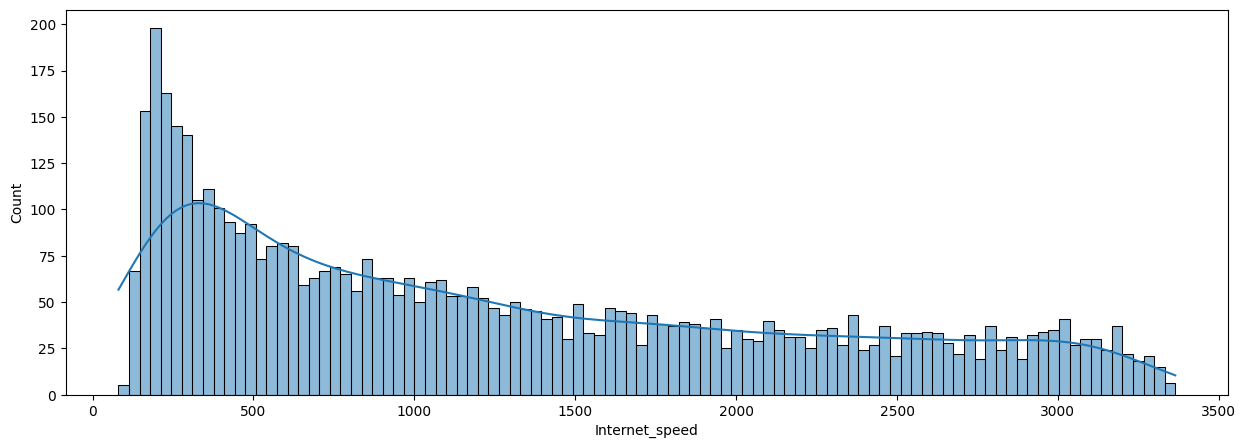

In [4]:
# Let us view how our target variable (Internet Speed) is distributed

plt.figure(figsize=(15,5))
sns.histplot(data=df,x='Internet_speed',bins=100,kde=True)
plt.show()

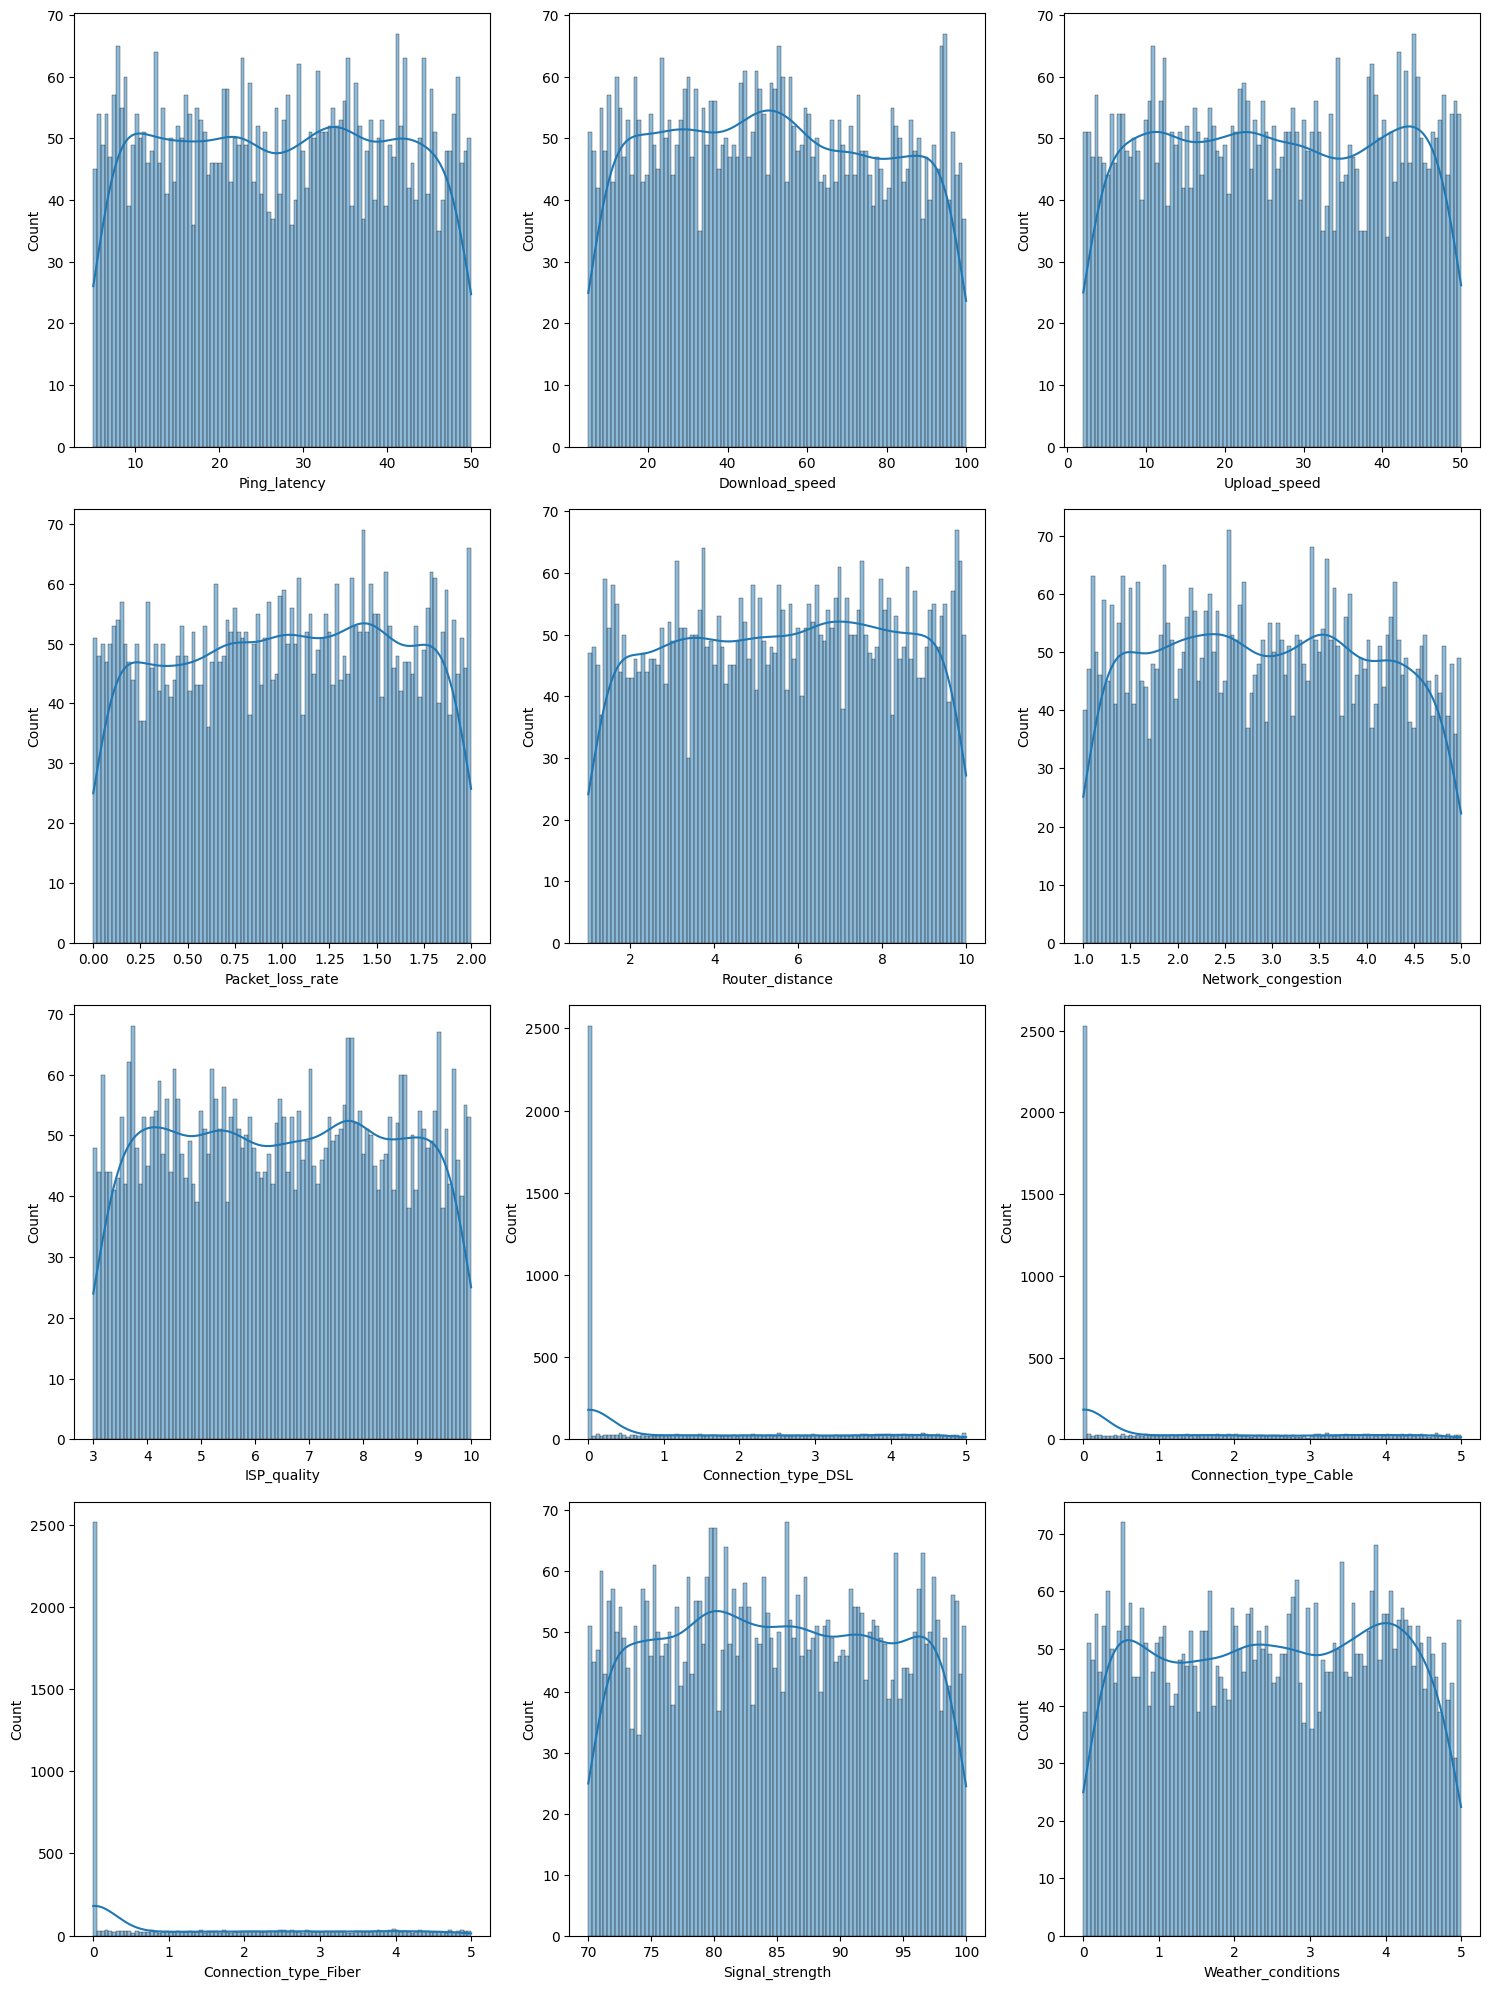

In [5]:
# All the features we have contain continuous values
# Let us look at how they are distributed

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.drop(columns='Internet_speed').columns):
    sns.histplot(data=df,x=col,ax=axes[i],kde=True,bins=100)

plt.tight_layout()
plt.show()

Connection_type_Fibre, Connection_type_DSL and Connection_type_Cable contain a lot of Zeroes as values

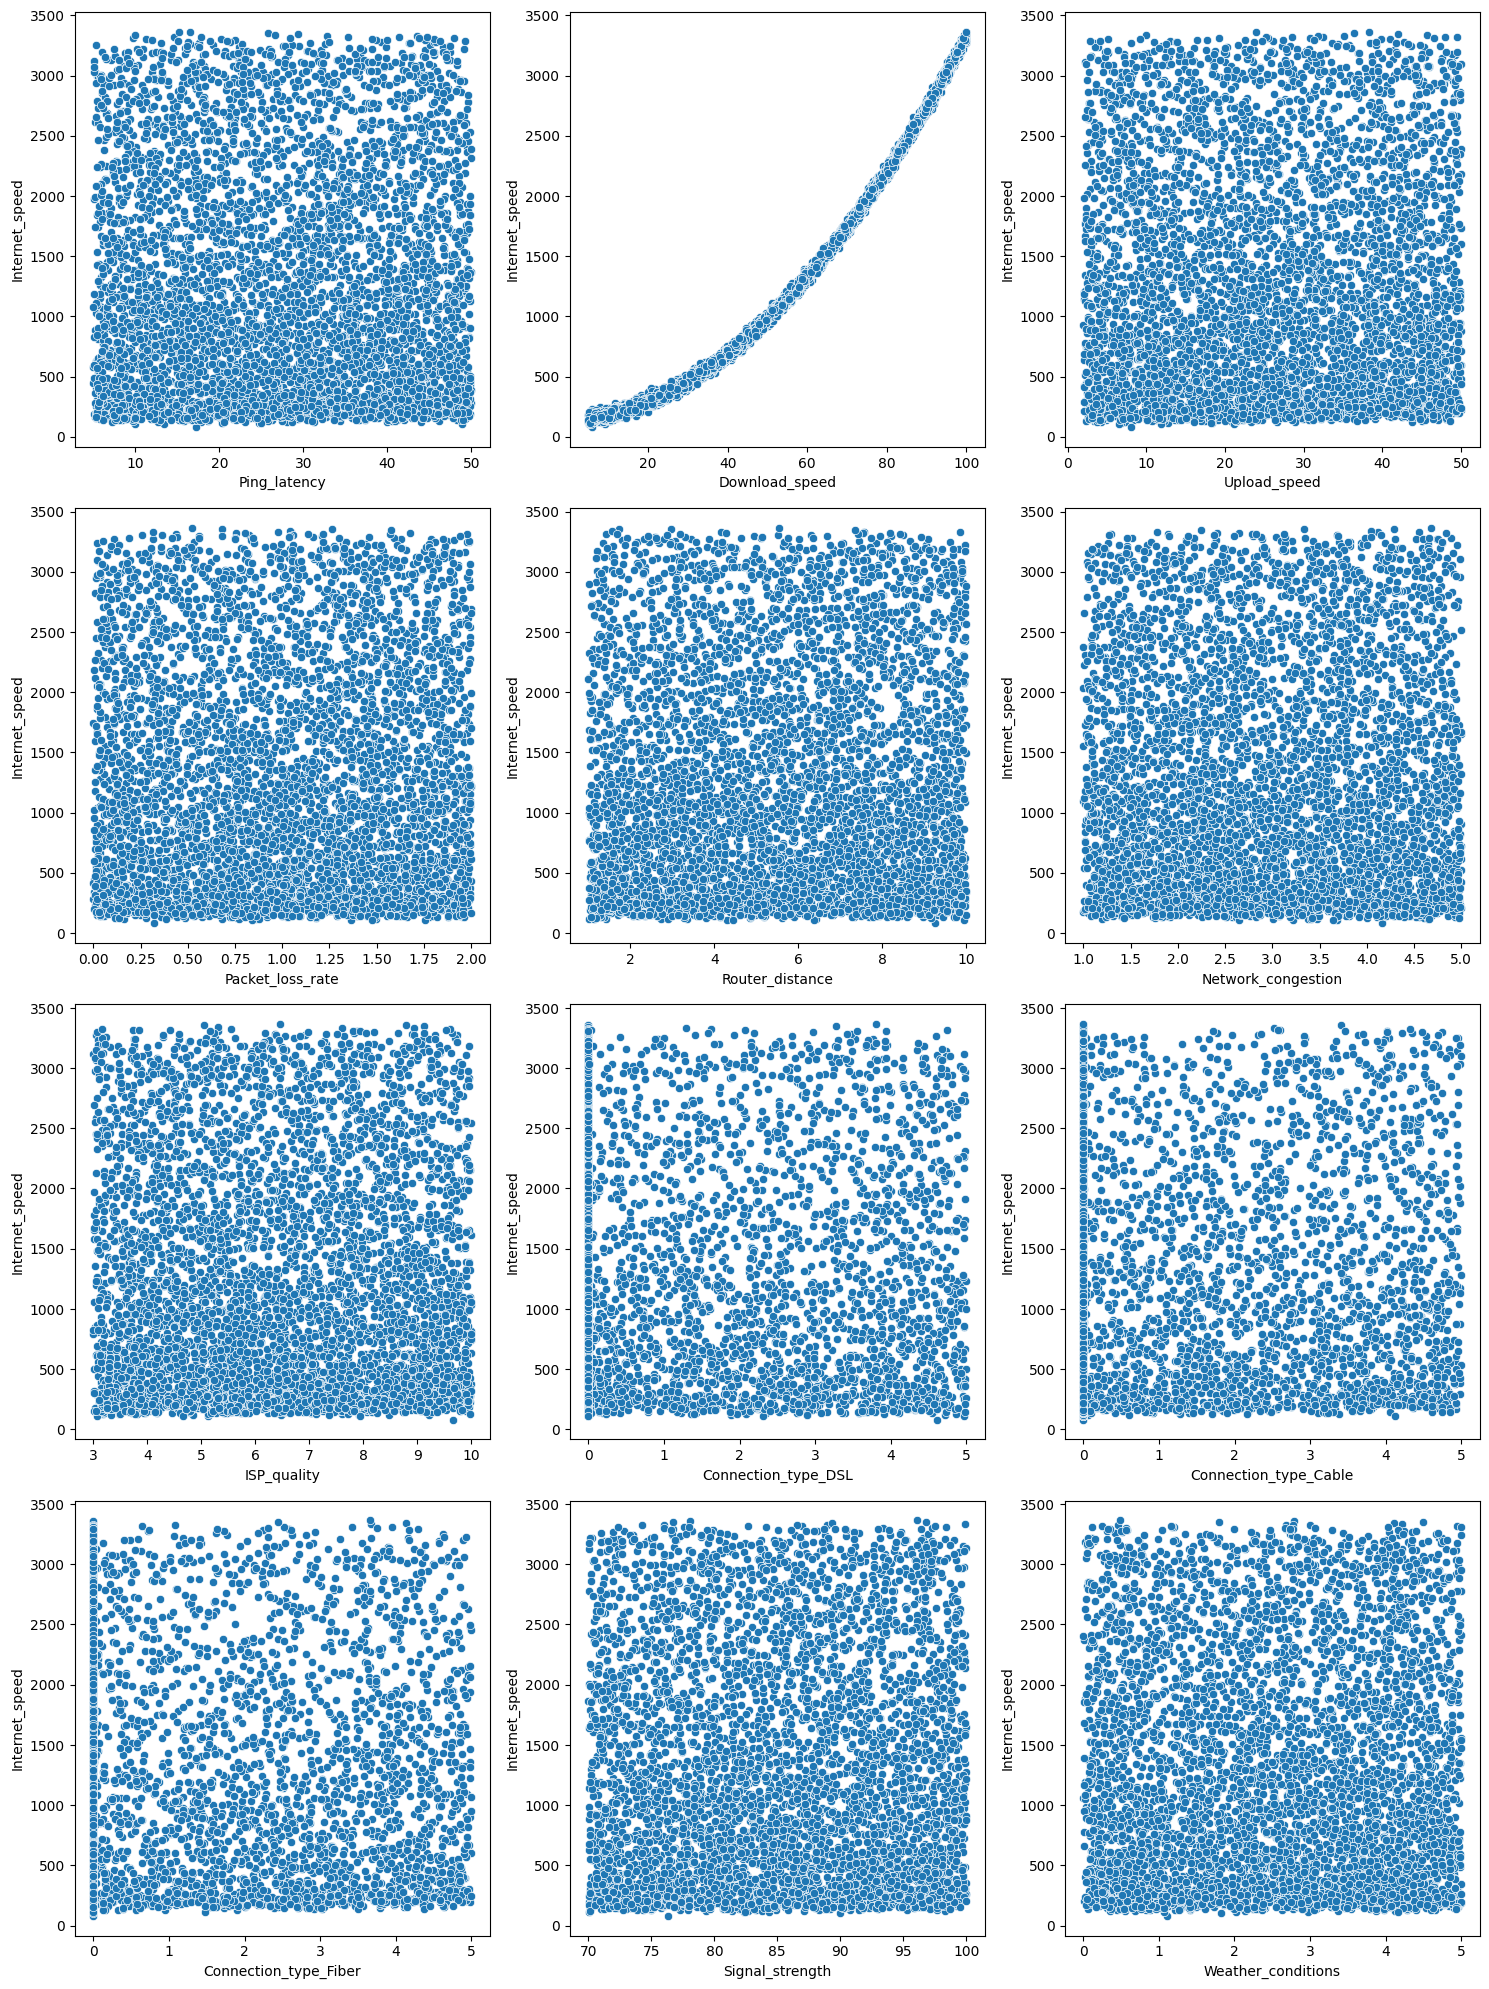

In [6]:
# Let us look at what kind of relationship they have with our target variable

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.drop(columns='Internet_speed').columns):
    sns.scatterplot(data=df,x=col,y='Internet_speed',ax=axes[i])

plt.tight_layout()
plt.show()

1. Download speed is linearly related to internet speed. This means that an increase in internet speed results in a proportional increase in download speed, and vice versa. In ideal conditions, doubling the internet speed would double the download speed. However, various factors such as network congestion, latency, hardware limitations, and distance from the server can affect the actual download speeds observed.

2. **Connection_type_Fibre, Connection_type_DSL and Connection_type_Cable, these three columns contain continuous values but the Author of this dataset has mentioned that they are binary indicators.** Let us take care of it during data preprocessing and plot these three again

****
# Data Preprocessing #
****

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ping_latency           5000 non-null   float64
 1   Download_speed         5000 non-null   float64
 2   Upload_speed           5000 non-null   float64
 3   Packet_loss_rate       5000 non-null   float64
 4   Router_distance        5000 non-null   float64
 5   Network_congestion     5000 non-null   float64
 6   ISP_quality            5000 non-null   float64
 7   Connection_type_DSL    5000 non-null   float64
 8   Connection_type_Cable  5000 non-null   float64
 9   Connection_type_Fiber  5000 non-null   float64
 10  Signal_strength        5000 non-null   float64
 11  Weather_conditions     5000 non-null   float64
 12  Internet_speed         5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


In [8]:
# First let us take care of null values if there are any

df.isnull().any()

Ping_latency             False
Download_speed           False
Upload_speed             False
Packet_loss_rate         False
Router_distance          False
Network_congestion       False
ISP_quality              False
Connection_type_DSL      False
Connection_type_Cable    False
Connection_type_Fiber    False
Signal_strength          False
Weather_conditions       False
Internet_speed           False
dtype: bool

In [9]:
# It appears we have no null values
# We have to take care of these three columns (Connection_type_Fibre, Connection_type_DSL and Connection_type_Cable) and convert those to binary

cols=['Connection_type_Fiber', 'Connection_type_DSL','Connection_type_Cable']
for col in cols:
    print(df[col].value_counts(),'\n\n')

Connection_type_Fiber
0.000000    2487
3.725206       1
3.803566       1
1.980719       1
0.786711       1
            ... 
0.407159       1
3.219988       1
2.187643       1
1.298123       1
2.486127       1
Name: count, Length: 2514, dtype: int64 


Connection_type_DSL
0.000000    2484
0.833348       1
1.962657       1
2.470766       1
3.300652       1
            ... 
3.235682       1
1.053457       1
1.002336       1
1.177406       1
0.011109       1
Name: count, Length: 2517, dtype: int64 


Connection_type_Cable
0.000000    2497
2.465138       1
1.187493       1
1.991681       1
0.908116       1
            ... 
1.311234       1
2.399817       1
1.121802       1
3.125806       1
4.308534       1
Name: count, Length: 2504, dtype: int64 




In [10]:
# We see that we have values other than 1 and 0
# Now, we will convert all the values which are not 0 to 1 in the above three columns

for col in cols:
    df[col]=df[col].apply(lambda x:1 if x!=0 else x)

for col in cols:
    print(df[col].value_counts(),'\n\n')

Connection_type_Fiber
1.0    2513
0.0    2487
Name: count, dtype: int64 


Connection_type_DSL
1.0    2516
0.0    2484
Name: count, dtype: int64 


Connection_type_Cable
1.0    2503
0.0    2497
Name: count, dtype: int64 




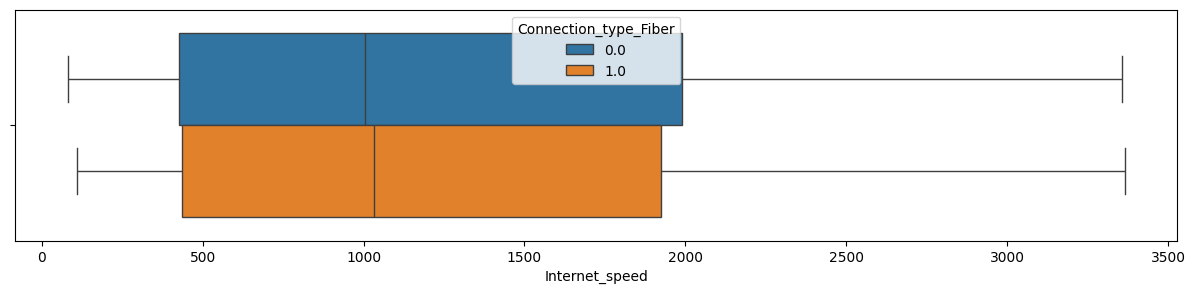

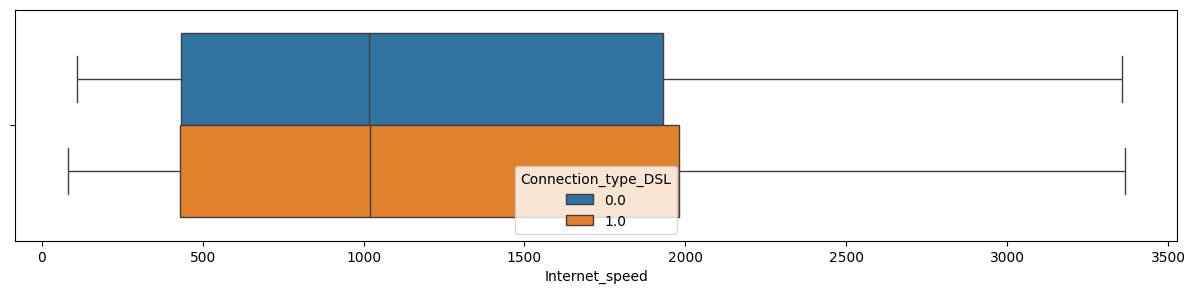

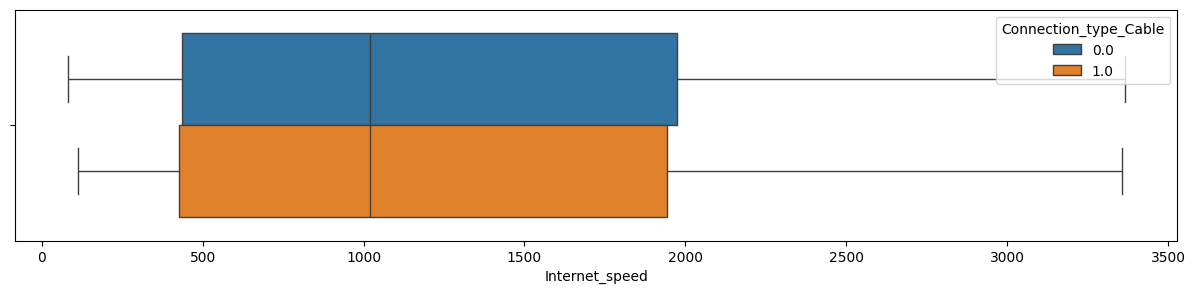

In [11]:
# We have succefully converted the three columns to binary (YAAAY!!!)
# let us plot them again and see how they are related to our target variable

for col in cols:
    plt.figure(figsize=(15,3))
    sns.boxplot(data=df, x='Internet_speed', hue=col)
    plt.show()

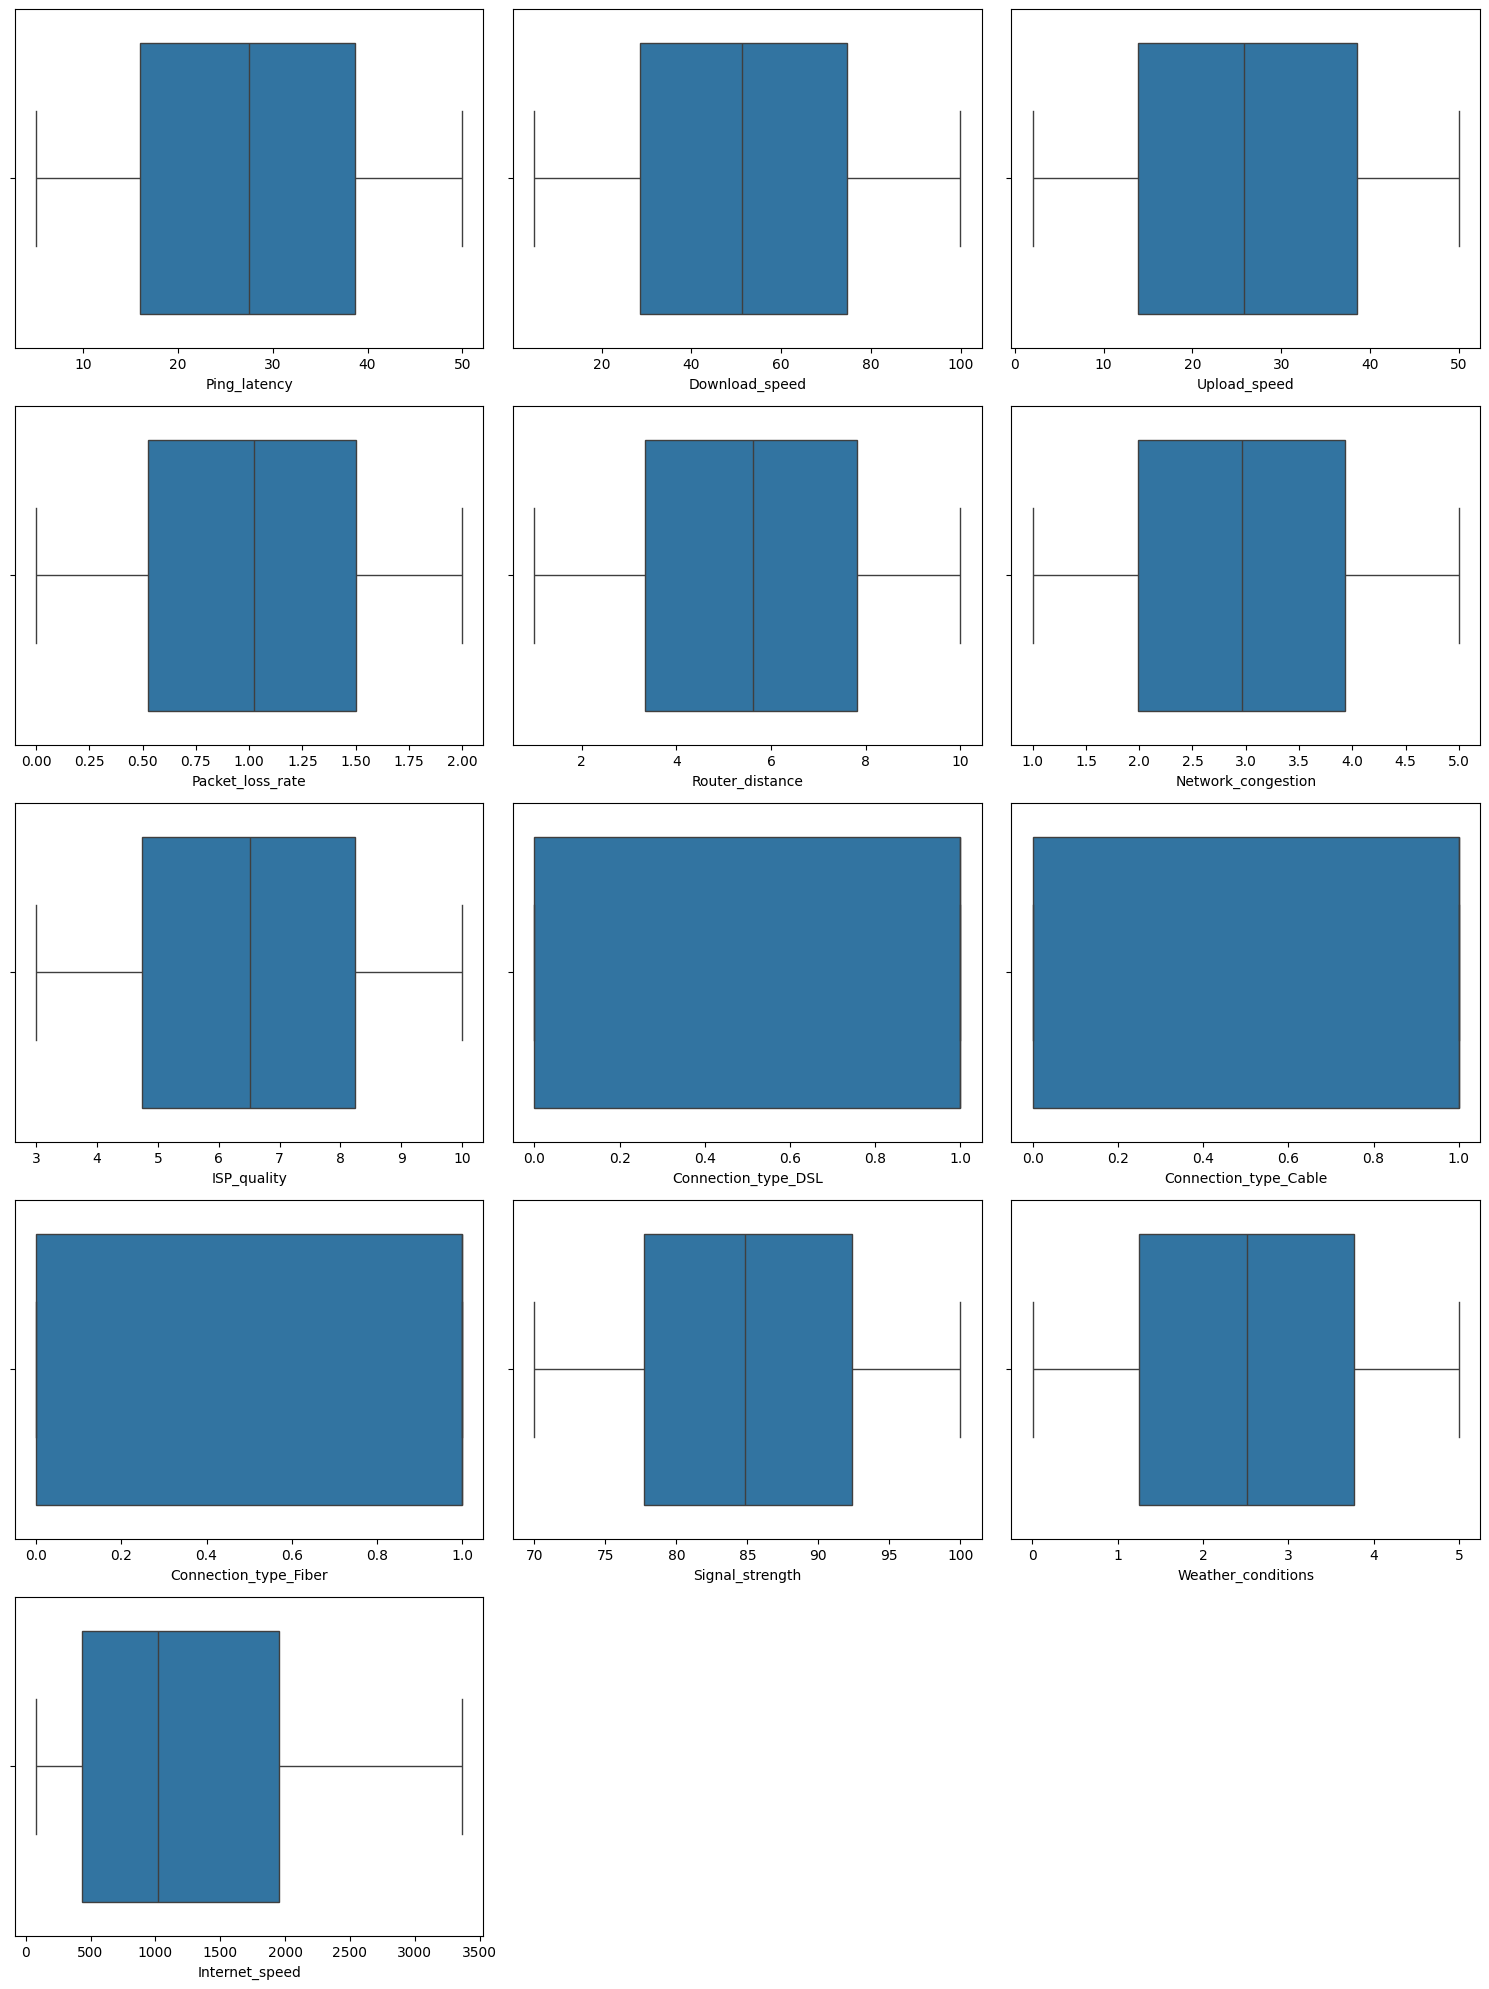

In [12]:
# Let us check for outliers in our dataset

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df,x=col,ax=axes[i])
axes[13].axis('off')
axes[14].axis('off')
plt.tight_layout()
plt.show()

In [13]:
# No Outliers  :)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ping_latency           5000 non-null   float64
 1   Download_speed         5000 non-null   float64
 2   Upload_speed           5000 non-null   float64
 3   Packet_loss_rate       5000 non-null   float64
 4   Router_distance        5000 non-null   float64
 5   Network_congestion     5000 non-null   float64
 6   ISP_quality            5000 non-null   float64
 7   Connection_type_DSL    5000 non-null   float64
 8   Connection_type_Cable  5000 non-null   float64
 9   Connection_type_Fiber  5000 non-null   float64
 10  Signal_strength        5000 non-null   float64
 11  Weather_conditions     5000 non-null   float64
 12  Internet_speed         5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


**Our data is clean and ready to go through the models**

**Before that we must see how the features are related to each other and then prepare the cleaned data**

****
# Feature Engineering #
****

**This Notebook will not be creating any new features but will only show how to calculate Mutual Information and display correlation using a heatmap**

In [14]:
# importing
from sklearn.feature_selection import mutual_info_regression

In [15]:
# let us first calculate mutual information to visua;ize non Lienar relationships
# We will then plot the correlation using a heatmap to visualize Linear relationships

tdf=df.copy()
x=df.drop(columns='Internet_speed')
y=df['Internet_speed']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                  Feature  Mutual Information
0          Download_speed            3.203895
1            Upload_speed            0.004304
2      Weather_conditions            0.002695
3      Network_congestion            0.000143
4            Ping_latency            0.000000
5        Packet_loss_rate            0.000000
6         Router_distance            0.000000
7             ISP_quality            0.000000
8     Connection_type_DSL            0.000000
9   Connection_type_Cable            0.000000
10  Connection_type_Fiber            0.000000
11        Signal_strength            0.000000


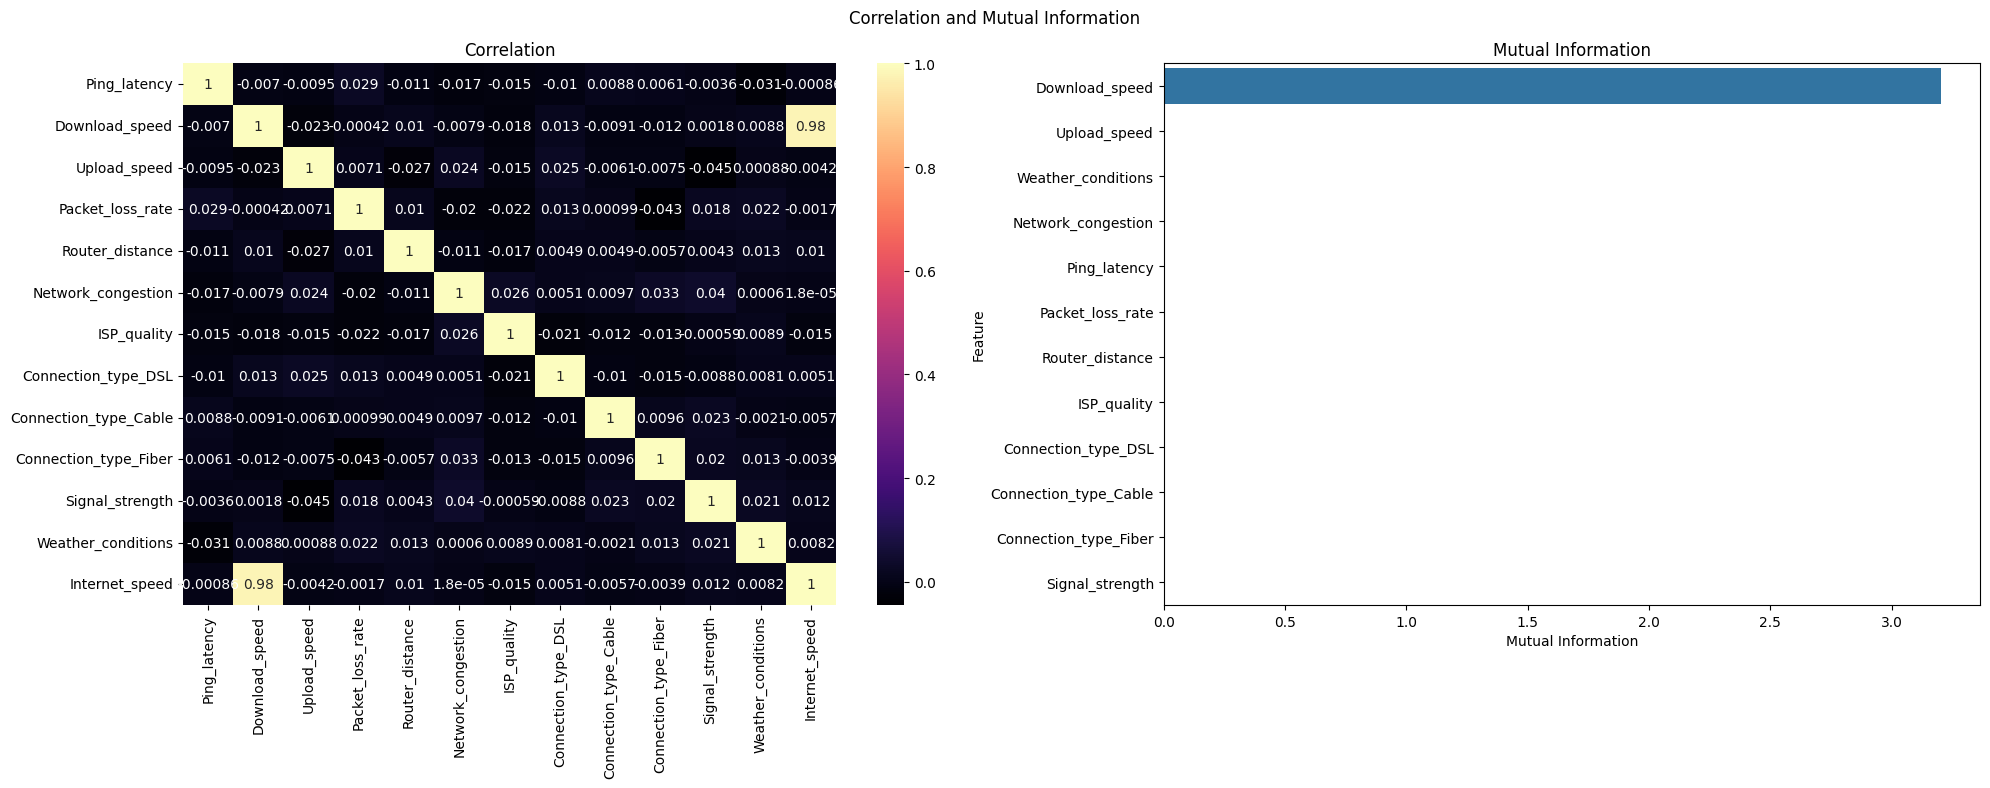

In [16]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(tdf.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information')
plt.tight_layout()
plt.show()

**It appears a lot of our features contribute very little towards predicting target variable.**

We can either drop them or we can keep them.

In this Notebook I will be keeping them and checking how the model performs

****
# Data Preparation #
****

In [17]:
# Importing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
x=df.drop(columns='Internet_speed')
y=df['Internet_speed']

In [19]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20) # Splitting the data into training subset(75%) and testing subset(25%)

In [20]:
# Scaling data for Linear,Ridge and Lasso Regression

ss=StandardScaler()
x_t=ss.fit_transform(x_t)
x_te=ss.transform(x_te)

****
# Models #
****

In [21]:
# importing

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR

In [22]:
r2_t=[]  #storing training r2 scores
r2=[]    #storing testing r2 scores
mse_t=[] #storing training mean squared errors
mse=[]   #storing testing mean squared errors
mae_t=[] #storing training mean absolute errors
mae=[]   #storing testing mean absolute errors

## Linear Regression ##

In [23]:
reg=LinearRegression()
reg.fit(x_t,y_t)
pred_t=reg.predict(x_t)
pred=reg.predict(x_te)

In [24]:
r2_t.append(r2_score(y_t,pred_t))
r2.append(r2_score(y_te,pred))
mse_t.append(mean_squared_error(y_t,pred_t))
mse.append(mean_squared_error(y_te,pred))
mae_t.append(mean_absolute_error(y_t,pred_t))
mae.append(mean_absolute_error(y_te,pred))

## Lasso Regression ##

In [25]:
l=Lasso()
params={'alpha':np.logspace(-3, 3, 10)}
nl=GridSearchCV(l,scoring='neg_mean_squared_error',cv=10,n_jobs=-1,param_grid=params)
nl.fit(x_t,y_t)
print(nl.best_params_)
print(nl.best_score_)
nl=nl.best_estimator_

{'alpha': 2.154434690031882}
-41395.80036381738


In [26]:
pred_t1=nl.predict(x_t)
pred1=nl.predict(x_te)

In [27]:
r2_t.append(r2_score(y_t,pred_t1))
r2.append(r2_score(y_te,pred1))
mse_t.append(mean_squared_error(y_t,pred_t1))
mse.append(mean_squared_error(y_te,pred1))
mae_t.append(mean_absolute_error(y_t,pred_t1))
mae.append(mean_absolute_error(y_te,pred1))

## Ridge Regression ##

In [28]:
r=Ridge()
params={'alpha':np.logspace(-3, 3, 10)}
nr=GridSearchCV(r,scoring='neg_mean_squared_error',cv=10,n_jobs=-1,param_grid=params)
nr.fit(x_t,y_t)
print(nr.best_params_)
print(nr.best_score_)
nr=nr.best_estimator_

{'alpha': 0.001}
-41415.04843921387


In [29]:
pred_t2=nr.predict(x_t)
pred2=nr.predict(x_te)

In [30]:
r2_t.append(r2_score(y_t,pred_t2))
r2.append(r2_score(y_te,pred2))
mse_t.append(mean_squared_error(y_t,pred_t2))
mse.append(mean_squared_error(y_te,pred2))
mae_t.append(mean_absolute_error(y_t,pred_t2))
mae.append(mean_absolute_error(y_te,pred2))

## Decision Tree Regressor ##

In [31]:
x_t=ss.inverse_transform(x_t)
x_te=ss.inverse_transform(x_te)

In [32]:
dt=DecisionTreeRegressor()
path=dt.cost_complexity_pruning_path(x_t,y_t) 
alphas=path.ccp_alphas 
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,n_jobs=-1,scoring='r2',cv=10)  # Finding Best Alpha
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 5.285880430899134}
0.9988389195721965


In [33]:
dt=DecisionTreeRegressor(ccp_alpha=best_alpha)
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Decision Tree Documentation
params={'criterion':['poisson','squared_error'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,scoring='r2',random_state=42,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': None, 'criterion': 'squared_error'}
0.9988283732051249


In [34]:
pred_t3=ndt.predict(x_t)
pred3=ndt.predict(x_te)  

In [35]:
r2_t.append(r2_score(y_t,pred_t3))
r2.append(r2_score(y_te,pred3))
mse_t.append(mean_squared_error(y_t,pred_t3))
mse.append(mean_squared_error(y_te,pred3))
mae_t.append(mean_absolute_error(y_t,pred_t3))
mae.append(mean_absolute_error(y_te,pred3))

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,rounded=True)
plt.show()

## Random Forest Regressor ##

In [36]:
rf=RandomForestRegressor()
params={'criterion':['poisson','squared_error'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[400]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='r2')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 400, 'min_samples_split': 21, 'min_samples_leaf': 14, 'max_features': None, 'criterion': 'squared_error'}
0.9991762691294659


In [37]:
pred_t4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [38]:
r2_t.append(r2_score(y_t,pred_t4))
r2.append(r2_score(y_te,pred4))
mse_t.append(mean_squared_error(y_t,pred_t4))
mse.append(mean_squared_error(y_te,pred4))
mae_t.append(mean_absolute_error(y_t,pred_t4))
mae.append(mean_absolute_error(y_te,pred4))

## AdaBoost Regressor ##

In [39]:
ada=AdaBoostRegressor()
params={
    'n_estimators': [300],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='r2')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 300, 'learning_rate': 1.82}
0.9986905583279748


In [40]:
pred_t5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [41]:
r2_t.append(r2_score(y_t,pred_t5))
r2.append(r2_score(y_te,pred5))
mse_t.append(mean_squared_error(y_t,pred_t5))
mse.append(mean_squared_error(y_te,pred5))
mae_t.append(mean_absolute_error(y_t,pred_t5))
mae.append(mean_absolute_error(y_te,pred5))

## Gradient Boost Regressor ##

In [42]:
gb=GradientBoostingRegressor()
params={'n_estimators': [400], 'learning_rate': np.arange(0.01, 2.01, 0.01)}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='r2')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'n_estimators': 400, 'learning_rate': 0.18000000000000002}
0.9993634137658466


In [43]:
ngb=ngb.best_estimator_
pred_t6=nada.predict(x_t)
pred6=nada.predict(x_te)

In [44]:
r2_t.append(r2_score(y_t,pred_t6))
r2.append(r2_score(y_te,pred6))
mse_t.append(mean_squared_error(y_t,pred_t6))
mse.append(mean_squared_error(y_te,pred6))
mae_t.append(mean_absolute_error(y_t,pred_t6))
mae.append(mean_absolute_error(y_te,pred6))

## Support Vector Machines ##

In [45]:
svr=SVR()
params= { 'C':np.logspace(-2, 2, 5),'epsilon':np.logspace(-2, 2, 5),'kernel': ['linear', 'poly', 'rbf']}
nsvr=GridSearchCV(svr,param_grid=params,scoring='neg_mean_squared_error', cv=5,verbose=1,n_jobs=-1)
nsvr.fit(x_t, y_t)
print(nsvr.best_params_)
print(nsvr.best_score_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'C': 100.0, 'epsilon': 0.01, 'kernel': 'rbf'}
-1263.2628544662007


In [46]:
nsvr=nsvr.best_estimator_
pred_t7=nsvr.predict(x_t)
pred7=nsvr.predict(x_te)

In [47]:
r2_t.append(r2_score(y_t,pred_t7))
r2.append(r2_score(y_te,pred7))
mse_t.append(mean_squared_error(y_t,pred_t7))
mse.append(mean_squared_error(y_te,pred7))
mae_t.append(mean_absolute_error(y_t,pred_t7))
mae.append(mean_absolute_error(y_te,pred7))

# Model Evaluation Metrics #

In [48]:
mods=['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','SVM']
s_t=pd.DataFrame({'Regression Algorithms':mods,'Training R2 Score':r2_t,'Training Mean Squared Error':mse_t,'Training Mean Absolute Error':mae_t})
s=pd.DataFrame({'Regression Algorithms':mods,'Testing R2 Score':r2,'Testing Mean Squared Error':mse,'Testing Mean Absolute Error':mae})
s_t=s_t.sort_values(by=['Training R2 Score','Training Mean Squared Error','Training Mean Absolute Error'],ascending=False).reset_index(drop=True)
s=s.sort_values(by=['Testing R2 Score','Testing Mean Squared Error','Testing Mean Absolute Error'],ascending=False).reset_index(drop=True)

In [49]:
s_t

,Regression Algorithms,Training R2 Score,Training Mean Squared Error,Training Mean Absolute Error
0,Random Forest Regressor,0.999450,473.768444,17.111281
1,Decision Tree Regressor,0.999126,752.701390,21.892937
2,SVM,0.998823,1013.513490,23.628339
3,AdaBoost Regressor,0.998791,1041.574072,26.170927
4,Gradient Boost Regressor,0.998791,1041.574072,26.170927
5,Linear Regression,0.952292,41097.663246,174.467277
6,Ridge Regression,0.952292,41097.663246,174.467275
7,Lasso Regression,0.952242,41140.458608,174.558209


In [50]:
s

,Regression Algorithms,Testing R2 Score,Testing Mean Squared Error,Testing Mean Absolute Error
0,Random Forest Regressor,0.999177,704.669429,21.181171
1,SVM,0.998876,963.119542,23.570552
2,Decision Tree Regressor,0.998810,1019.625714,25.656645
3,AdaBoost Regressor,0.998659,1148.526570,26.924544
4,Gradient Boost Regressor,0.998659,1148.526570,26.924544
5,Linear Regression,0.953634,39712.585165,171.102598
6,Ridge Regression,0.953634,39712.588931,171.102599
7,Lasso Regression,0.953604,39738.483414,171.043472


# Residual Plots #

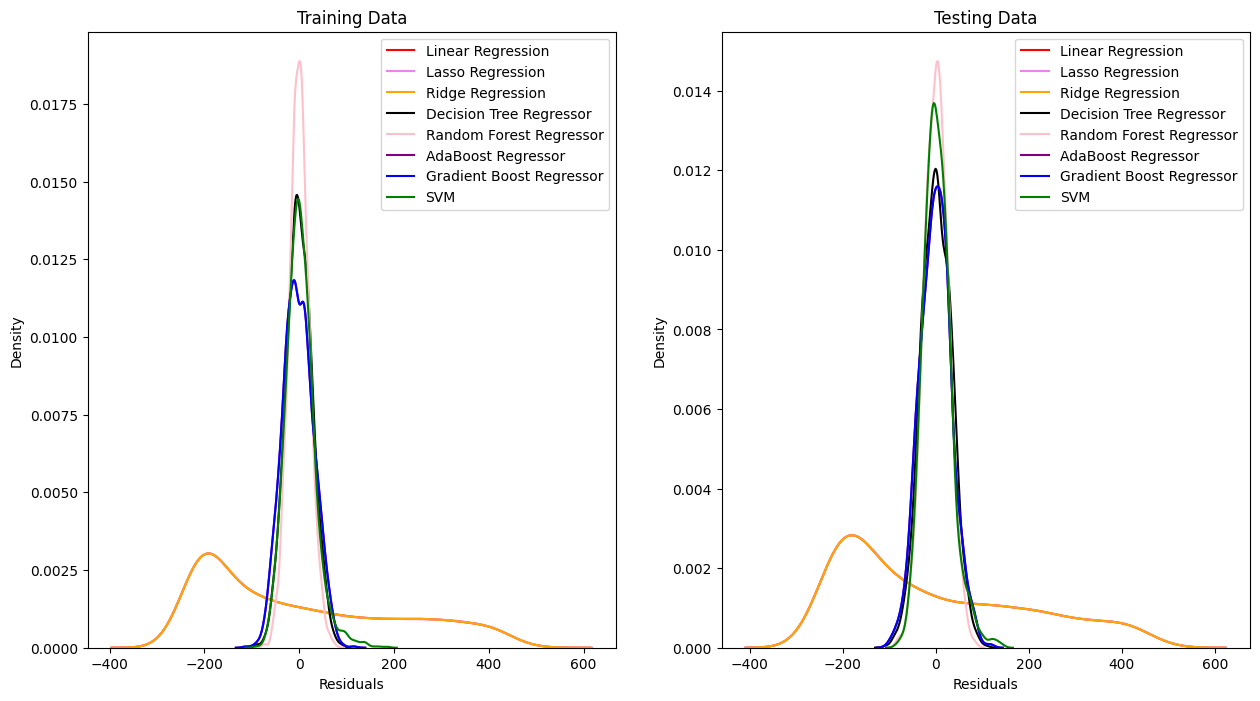

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.kdeplot(y_t - pred_t, label='Linear Regression', color='Red',ax=axes[0])
sns.kdeplot(y_t - pred_t1, label='Lasso Regression', color='violet',ax=axes[0])
sns.kdeplot(y_t - pred_t2, label='Ridge Regression', color='Orange',ax=axes[0])
sns.kdeplot(y_t - pred_t3, label='Decision Tree Regressor', color='black',ax=axes[0])
sns.kdeplot(y_t - pred_t4, label='Random Forest Regressor', color='pink',ax=axes[0])
sns.kdeplot(y_t - pred_t5, label='AdaBoost Regressor', color='purple',ax=axes[0])
sns.kdeplot(y_t - pred_t6, label='Gradient Boost Regressor', color='blue',ax=axes[0])
sns.kdeplot(y_t - pred_t7, label='SVM', color='green',ax=axes[0])
axes[0].legend()
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')
axes[0].set_title('Training Data')
sns.kdeplot(y_te - pred, label='Linear Regression', color='Red',ax=axes[1])
sns.kdeplot(y_te- pred1, label='Lasso Regression', color='violet',ax=axes[1])
sns.kdeplot(y_te - pred2, label='Ridge Regression', color='Orange',ax=axes[1])
sns.kdeplot(y_te - pred3, label='Decision Tree Regressor', color='black',ax=axes[1])
sns.kdeplot(y_te - pred4, label='Random Forest Regressor', color='pink',ax=axes[1])
sns.kdeplot(y_te - pred5, label='AdaBoost Regressor', color='purple',ax=axes[1])
sns.kdeplot(y_te - pred6, label='Gradient Boost Regressor', color='blue',ax=axes[1])
sns.kdeplot(y_te - pred7, label='SVM', color='green',ax=axes[1])
axes[1].legend()
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].set_title('Testing Data')
plt.show()

# Conclusion #

1. Random Forest Regressor demonstrated the best overall performance, exhibiting minimal discrepancies between training and testing scores, indicating strong generalization and robustness against overfitting.

2. Decision Tree Regressor closely followed the Random Forest, with high training and testing scores, but it showed slightly more variance, suggesting it may be more prone to overfitting compared to ensemble methods.

3. Support Vector Machine (SVM) provided solid performance, maintaining high scores in both training and testing, although it lagged slightly behind Random Forest and Decision Tree in terms of absolute error metrics during training but performed marginally better during testing

4. AdaBoost and Gradient Boost Regressors exhibited comparable performance, with both algorithms showing similar training and testing scores; however, they underperformed relative to Random Forest and Decision Tree in terms of error metrics.

5. Linear Regression, Ridge Regression, and Lasso Regression displayed significantly lower performance metrics, indicating they struggled to capture the underlying data patterns effectively compared to the other algorithms.

**Overall Random Forest consistently outperformed linear models and other ensemble models making it the preferred Model to use for prediction of Internet Speed**

# Suggestions and Feedback #

**Kindly provide feedback and suggestions to improve this notebook**

**If you found this notebook helpful or you liked it kindly Upvote  :)**